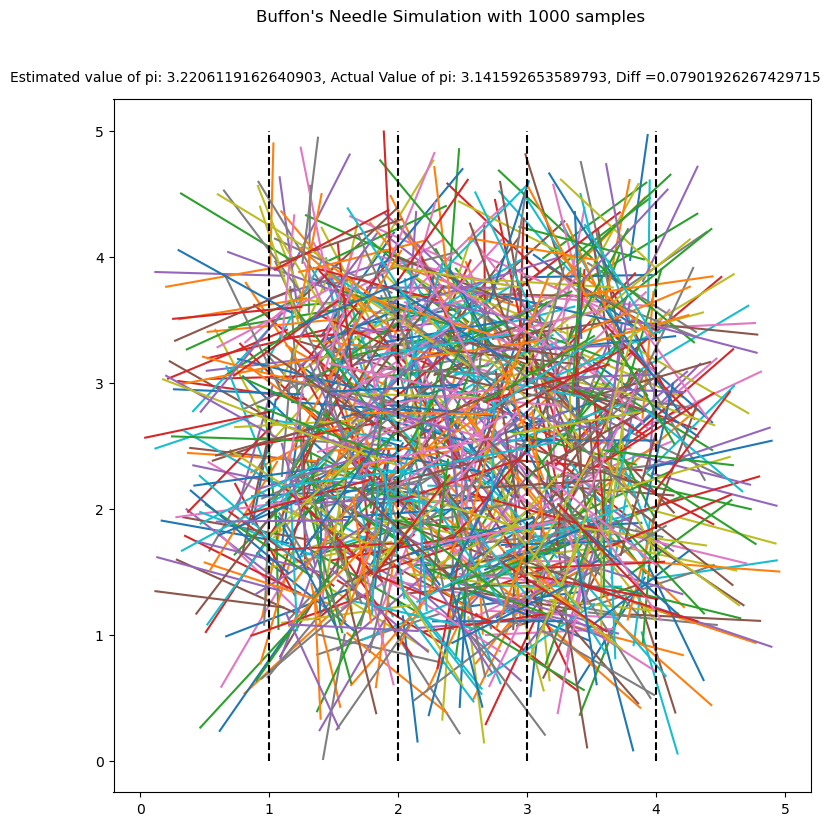

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import pandas as pd

# parameters 
sample_size = 1000
sig_figs = 10000

# initializing plot 
fig = plt.figure(figsize=[9, 9])
fig.suptitle('Buffon\'s Needle Simulation with {} samples'.format(sample_size))
fig.subplots_adjust(hspace=.4)
board = fig.add_subplot(1, 1, 1)

# defining the dataframe 
needles = pd.DataFrame({'x_point':[], 'y_point':[], 'x_end_point':[], 'y_end_point':[], 'crossed_line':[]})

# generating the needles
for n in range(0, sample_size):
    x = rd.randrange(sig_figs, (4 * sig_figs)) / sig_figs
    y = rd.randrange(sig_figs, (4 * sig_figs)) / sig_figs
    theta = np.deg2rad(rd.randrange(0, 360 * sig_figs) / sig_figs)

    length = 1.0  # assuming unit length for simplicity
    x_end = x + length * np.sin(theta)
    y_end = y + length * np.cos(theta)

    board.plot([x, x_end], [y, y_end])

    crossed = abs(int(y) - int(y_end)) == 1
    new_needle = [x, y, x_end, y_end, crossed]
    needles.loc[n] = new_needle

# saving the dataframe
needles.to_csv('buffons_needle_sim.csv')

# adding yard lines
yard_lines = [[[1,1],[0,5]],[[2,2],[0,5]],[[3,3],[0,5]],[[4,4],[0,5]]]
for n in range(0, 4):
    board.plot(yard_lines[n][0], yard_lines[n][1], 'k--')

# estimating pi 
crossed_count = len(needles[needles['crossed_line'] == True])
pi_est = (2 * sample_size) / crossed_count
diff = pi_est - np.pi
text = 'Estimated value of pi: {}, Actual Value of pi: {}, Diff ={}'.format(pi_est, np.pi, diff)
fig.text(.01, .9, text)

# calling the plot
plt.show()
